#University of Bern: Module 3 Neural Network Project

#Brain Tumor Classification (MRI)
classify MRI images into four classes

dataset from https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

github repository:https://github.com/sartajbhuvaji/brain-tumor-classification-dataset

##Abstract
A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

###Context
Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

###Definition
To Detect and Classify Brain Tumor using, CNN and TL; as an asset of Deep Learning and to examine the tumor position(segmentation).

###Acknowledgements for Dataset.
Navoneel Chakrabarty
Swati Kanchan

##1. Fully-Connected Neural Network
In this section we will create a fully-connected neural network to perform brain tumor recognition and classification using TensorFlow.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf
from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
# create a directory
!mkdir brain_tumor_dataset
!cd brain_tumor_dataset

# download the dataset
!wget https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/master.zip

# unzip the dataset and delete the zip
!unzip master.zip && rm master.zip

# concatenate the multiple zipped data in a single zip
cat brainTumorDataPublic_* > brainTumorDataPublic_temp.zip
zip -FF brainTumorDataPublic_temp.zip --out data.zip

# remove the temporary files
rm brainTumorDataPublic_*

# unzip the full archive and delete it 
unzip data.zip -d data && rm data.zip

In [4]:
# check how many files "master" contains
!find /content/Brain-Tumor-Classification-DataSet-master -type f | wc -l

822


In [5]:
# Defining Training Directories
import pathlib
from pandas import DataFrame

training_glioma_dir = pathlib.Path('/content/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor')

training_pituitary_dir = pathlib.Path('/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor')

training_meningioma_dir = pathlib.Path('/content/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor')

training_no_tumor_dir = pathlib.Path('/content/Brain-Tumor-Classification-DataSet-master/Training/no_tumor')

In [6]:
image_count = len(list(training_glioma_dir.glob('*.jpg')))
print(image_count)

826


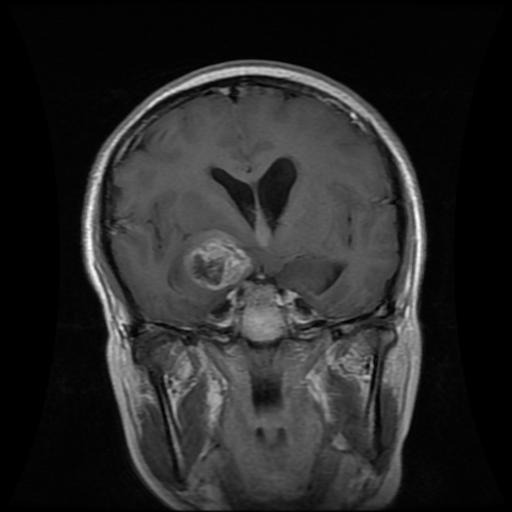

In [7]:
glioma = list(training_glioma_dir.glob('*'))
PIL.Image.open(str(glioma[0]))

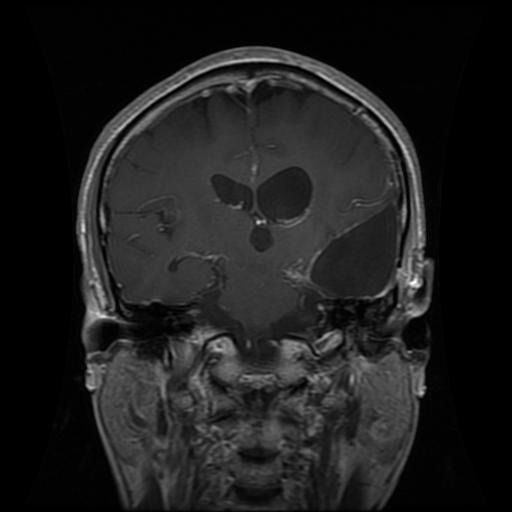

In [8]:
PIL.Image.open(str(glioma[25]))

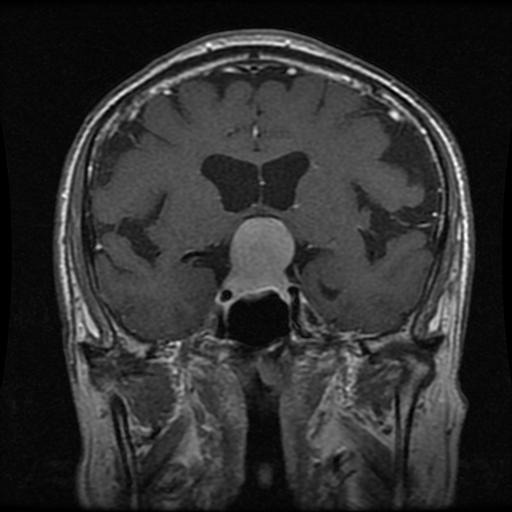

In [9]:
pituitary = list(training_pituitary_dir.glob('*'))
PIL.Image.open(str(pituitary[0]))

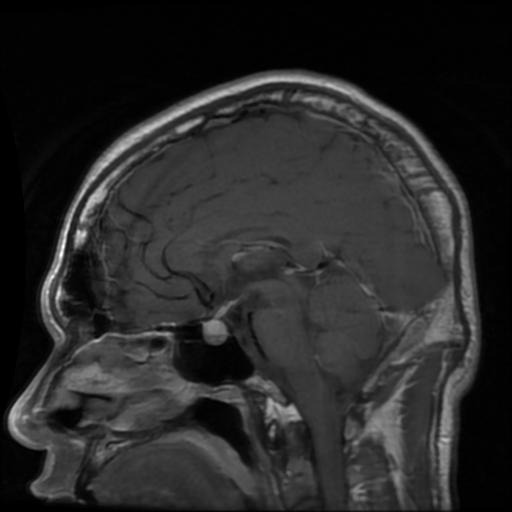

In [10]:
PIL.Image.open(str(pituitary[47]))

In [11]:
#Feeding Training Data to X_train and y_train

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
train_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor"
train_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor"
train_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Training/no_tumor"
train_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor"

X_train = []
y_train = []

for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Glioma')
    
for i in tqdm(os.listdir(train_meningioma)):
    path = os.path.join(train_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Meningioma')
    
for i in tqdm(os.listdir(train_no_tumour)):
    path = os.path.join(train_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('No_Tumour')   
    
for i in tqdm(os.listdir(train_pituitary)):
    path = os.path.join(train_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Pituitary') 

100%|██████████| 827/827 [00:03<00:00, 221.44it/s]


In [12]:
#Feeding Testing Data to X_train and y_train

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
test_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor"
test_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor"
test_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Testing/no_tumor"
test_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Testing/pituitary_tumor"

X_test = []
y_test = []

for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Glioma')
    
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Meningioma')
    

for i in tqdm(os.listdir(test_no_tumour)):
    path = os.path.join(test_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('No_Tumour') 
    
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Pituitary')  

100%|██████████| 74/74 [00:00<00:00, 129.17it/s]


In [13]:
# Defining training arrays and check size
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape,y_train.shape

((2870, 224, 224, 3), (2870,))

In [14]:
# Defining testing arrays and check size
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape,y_test.shape

((394, 224, 224, 3), (394,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


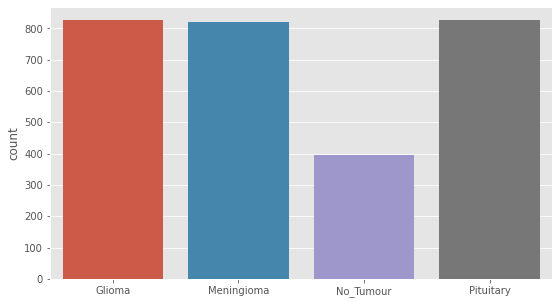

In [15]:
# Distribution of training pictures by category
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


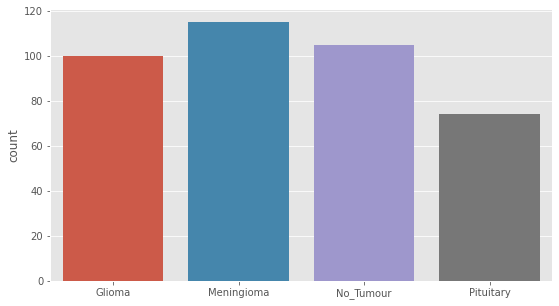

In [16]:
# Distribution of testing pictures by category
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_test)
plt.show()

In [17]:
# resize arrays
X_train_2d = X_train/255.0
X_test_2d = X_test/255.0


print ('train: data shape', X_train_2d.shape, 'label shape', y_train.shape)
print ('test: data shape', X_test_2d.shape, 'label shape', y_test.shape)

train: data shape (2870, 224, 224, 3) label shape (2870,)
test: data shape (394, 224, 224, 3) label shape (394,)


In [19]:
# check the contents of training arraiy
y_train

array(['Glioma', 'Glioma', 'Glioma', ..., 'Pituitary', 'Pituitary',
       'Pituitary'], dtype='<U10')

In [20]:
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

In [22]:
unique,counts = np.unique(y_train,return_counts=True)
print(unique,counts)

[0 1 2 3] [826 822 395 827]


In [24]:
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [26]:
unique1,counts1 = np.unique(y_test,return_counts=True)
print(unique1,counts1)

[0 1 2 3] [100 115 105  74]


In [27]:
y_train.shape

(2870,)

In [28]:
y_test.shape

(394,)

In [29]:
# Perform one-hot encoding
n_train = X_train_2d.shape[0]
n_test = X_test_2d.shape[0]

X_train = X_train_2d.reshape([n_train, -1])
X_test = X_test_2d.reshape([n_test, -1])

y_train_1_hot = np.zeros((n_train, y_train.max()+1))
y_train_1_hot[np.arange(n_train),y_train] = 1

y_test_1_hot = np.zeros((n_test, y_test.max()+1))
y_test_1_hot[np.arange(n_test), y_test] = 1

In [30]:
img = X_train_2d[0]
lbl = y_train[0]
lbl_1_hot = y_train_1_hot[0]

one-hot label: [1. 0. 0. 0.] . Actual label: 0


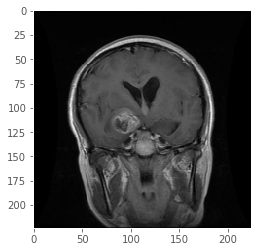

In [31]:
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.grid(False)
print('one-hot label:',lbl_1_hot, '. Actual label:', lbl )

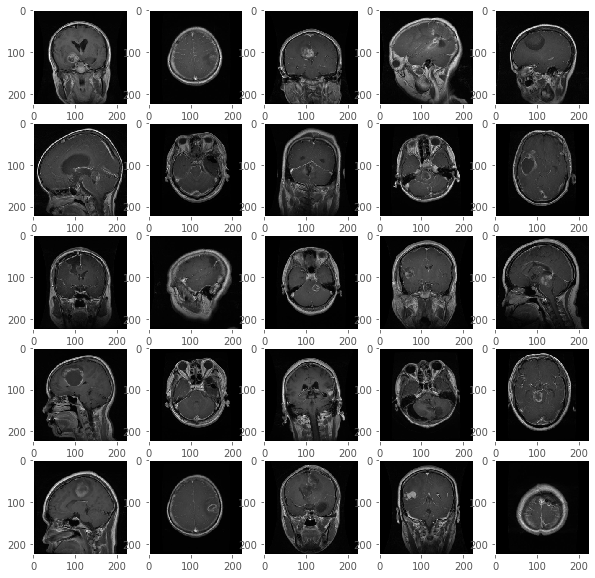

In [32]:
fig, axs = plt.subplots(5, 5, figsize=(10,10))
for idx, im in enumerate(X_train_2d[0:25]):
    y_idx = idx // 5
    x_idx = idx % 5
    axs[y_idx][x_idx].imshow(im, cmap='gray', interpolation='nearest')
    axs[y_idx][x_idx].grid(False)
plt.show()

### Tensor-flow 1

In [33]:
def fully_connected_layer(x, n_output, name=None, activation=None):
    """Fully connected layer.

    Parameters
    ----------
    x : tf.Tensor
        Input tensor to connect
    n_output : int
        Number of output neurons
    name : None, optional
        TF Scope to apply
    activation : None, optional
        Non-linear activation function

    Returns
    -------
    h, W : tf.Tensor, tf.Tensor
        Output of the fully connected layer and the weight matrix
    """
    if len(x.get_shape()) != 2:
        x = tf.flatten(x, reuse=None)

    n_input = x.get_shape().as_list()[1]

    with tf.variable_scope(name or "fc", reuse=None):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            dtype=tf.float32,
            initializer=tf.initializers.glorot_uniform())

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.initializers.constant(0.0))

        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(x, W),
            bias=b)

        if activation:
            h = activation(h)

        return h, W

In [34]:
n_input = X_train.shape[1]
n_output = y_train_1_hot.shape[1]

In [35]:
import sys
import shutil

import IPython.display as ipyd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 5px;
    color: #0000aa;
    background-color: #cccccc;
} </style>""")
%load_ext tensorboard

Instructions for updating:
non-resource variables are not supported in the long term


In [59]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_input])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])
    
    # 5 layer: 150528 inputs -> 4 outputs
    # no (i.e. linear) activation
    L1, W1 = fully_connected_layer(X , 1500, 'L1', activation=tf.nn.relu)   #3. first layer: takes X as input, 1500, relu
    L2, W2 = fully_connected_layer(L1 , 512, 'L2', activation=tf.nn.relu)
    L3, W3 = fully_connected_layer(L2 , 256, 'L3', activation=tf.nn.relu)
    L4, W4 = fully_connected_layer(L3, 64, 'L4', activation=tf.nn.relu)
    L5, W5 = fully_connected_layer(L4, 4, 'L5') #4. last layer, 4 neurons, NO ACTIVATION HERE
    # softmax activation
    Y_onehot = tf.nn.softmax(L5, name='Logits')
    
    # prediction: onehot->integer
    Y_pred = tf.argmax(Y_onehot, axis=1, name='YPred')
    
    # cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(Y_onehot), reduction_indices=[1]))
    # here we use numerically stable implementation of the same:
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=L5, labels=Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)
    
    # get fraction of correctly assigned labels
    Y_true = tf.argmax(Y, 1)
    Correct = tf.equal(Y_true, Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

0.5278746 0.25888324
0.6317073 0.35786802
0.69094074 0.4035533
0.6665505 0.40862945
0.81289196 0.5329949
0.861324 0.60913706
0.82508713 0.52791876
0.8770035 0.5609137
0.9055749 0.65989846
0.9327526 0.6395939
0.8986063 0.65736043
0.96132404 0.6852792
0.9264808 0.64467007
0.9118467 0.6928934
0.91254354 0.69796956


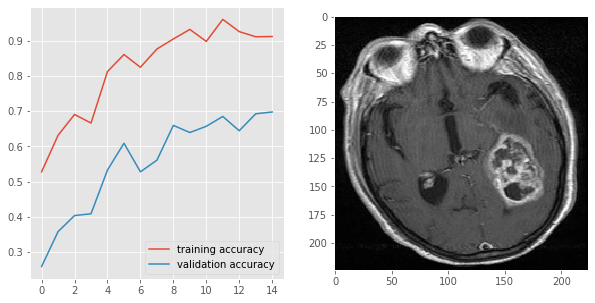

found label: 1 true label: 0


In [60]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 64
    n_epochs = 15

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            X_batch, y_batch = X_train[sub_idx], y_train_1_hot[sub_idx]

            sess.run(optimizer, feed_dict={
                X: X_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: X_test,
                             Y: y_test_1_hot
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: X_train,
                             Y: y_train_1_hot
                             })
        print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)

    # final test accuracy:
    corr, accr = sess.run((Correct, Accuracy),
                          feed_dict={
                              X: X_test,
                              Y: y_test_1_hot
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0]
    wrong0_lbl, L1_res, L2_res, L3_res = sess.run([Y_pred, L1, L2, L3],
                   feed_dict={
                       X: X_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test_1_hot[wrong_idx0:wrong_idx0+1]
                   })
    wrong0_lbl, L1_res, L2_res, L3_res = wrong0_lbl[0], L1_res[0], L2_res[0], L3_res[0]
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].imshow(X_test_2d[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

In [ ]:
#model.evaluate(X_test,  y_test_1_hot, verbose=2)

The learned model parameters W1 are a matrix of weights that show importance of each input pixel (150528) for each of the 1500 outputs.

In [62]:
print(W1_res.shape)

(150528, 1500)


Let's visualize the trained weights:

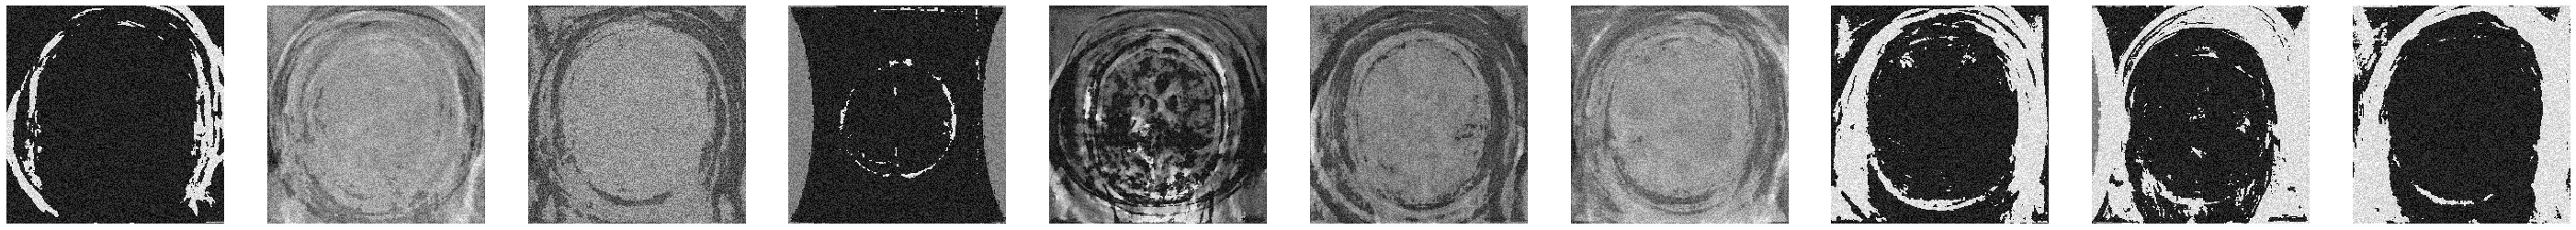

In [63]:
W1_res = W1_res.reshape(224,224,3,1500)
_, axs = plt.subplots(1, 10, figsize=(50,30))
for i in range(10):
    axs[i].imshow(W1_res[..., 0, i], cmap='gray', interpolation='nearest')
    axs[i].grid(False)
    axs[i].axis('off')

### Tensor-flow 2

In [3]:
colab = True # set to True is using google colab

In [4]:
if colab:
    %tensorflow_version 2.x

In [5]:
import sys
import os
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipyd
import tensorflow as tf

# We'll tell matplotlib to inline any drawn figures like so:
#%matplotlib inline
#plt.style.use('ggplot')

from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 5px;
    color: #0000aa;
    background-color: #cccccc;
} </style>""")

#%load_ext tensorboard

In [22]:
#Feeding Training Data to X_train and y_train
from tqdm import tqdm

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
train_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor"
train_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor"
train_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Training/no_tumor"
train_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor"

X_train = []
y_train = []

for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Glioma')
    
for i in tqdm(os.listdir(train_meningioma)):
    path = os.path.join(train_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Meningioma')
    
for i in tqdm(os.listdir(train_no_tumour)):
    path = os.path.join(train_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('No_Tumour')   
    
for i in tqdm(os.listdir(train_pituitary)):
    path = os.path.join(train_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Pituitary') 

100%|██████████| 827/827 [00:04<00:00, 173.69it/s]


In [23]:
#Feeding Testing Data to X_train and y_train

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
test_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor"
test_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor"
test_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Testing/no_tumor"
test_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Testing/pituitary_tumor"

X_test = []
y_test = []

for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Glioma')
    
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Meningioma')
    

for i in tqdm(os.listdir(test_no_tumour)):
    path = os.path.join(test_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('No_Tumour') 
    
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Pituitary')  

100%|██████████| 74/74 [00:00<00:00, 120.43it/s]


In [24]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape,y_train.shape

((2870, 224, 224, 3), (2870,))

In [25]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape,y_test.shape

((394, 224, 224, 3), (394,))

In [26]:
X_train_2d = X_train/255.0
X_test_2d = X_test/255.0

print ('train: data shape', X_train_2d.shape, 'label shape', y_train.shape)
print ('test: data shape', X_test_2d.shape, 'label shape', y_test.shape)

train: data shape (2870, 224, 224, 3) label shape (2870,)
test: data shape (394, 224, 224, 3) label shape (394,)


In [27]:
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

In [28]:
#from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [29]:
y_train

array([0, 0, 0, ..., 3, 3, 3])

In [16]:
#n_train = X_train_2d.shape[0]
#n_test = X_test_2d.shape[0]

#y_train_1_hot = np.zeros((n_train, y_train.max()+1))
#y_train_1_hot[np.arange(n_train),y_train] = 1

#y_test_1_hot = np.zeros((n_test, y_test.max()+1))
#y_test_1_hot[np.arange(n_test), y_test] = 1

In [30]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224,3)),
  tf.keras.layers.Dense(1500, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              225793500 
_________________________________________________________________
dense_4 (Dense)              (None, 128)               192128    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 225,986,144
Trainable params: 225,986,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#%tensorboard --logdir logs

In [32]:
save_path = 'save/mnist_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

logdir="logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(x=X_train, y=y_train,
                 epochs=10, batch_size=16, 
                 validation_data=(X_test, y_test),
                 callbacks=[save_callback, tensorboard_callback])

Epoch 1/10
180/180 [==============================] - 172s 954ms/step - loss: 6210.2546 - accuracy: 0.4338 - val_loss: 3646.1694 - val_accuracy: 0.3883
Epoch 2/10
180/180 [==============================] - 189s 1s/step - loss: 454.1507 - accuracy: 0.6198 - val_loss: 902.9780 - val_accuracy: 0.4061
Epoch 3/10
180/180 [==============================] - 178s 990ms/step - loss: 111.8170 - accuracy: 0.6775 - val_loss: 533.1468 - val_accuracy: 0.4975
Epoch 4/10
180/180 [==============================] - 177s 983ms/step - loss: 47.5098 - accuracy: 0.7238 - val_loss: 252.7359 - val_accuracy: 0.5102
Epoch 5/10
180/180 [==============================] - 192s 1s/step - loss: 27.2978 - accuracy: 0.7369 - val_loss: 198.3022 - val_accuracy: 0.5635
Epoch 6/10
180/180 [==============================] - 215s 1s/step - loss: 14.1313 - accuracy: 0.7732 - val_loss: 130.5054 - val_accuracy: 0.5761
Epoch 7/10
180/180 [==============================] - 215s 1s/step - loss: 7.7770 - accuracy: 0.8165 - val_los

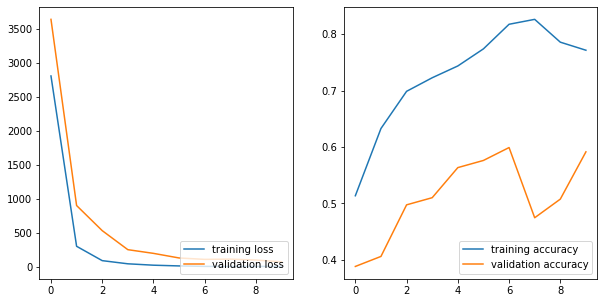

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

Current model performance can be evaluated on a dataset:

In [34]:
model.evaluate(X_test,  y_test, verbose=2)

13/13 - 4s - loss: 73.6329 - accuracy: 0.5914


[73.63289642333984, 0.5913705825805664]

We can test the trained model on a image:

true lablel:  0 predicted:  1


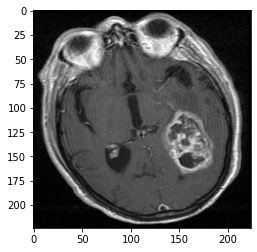

In [35]:
im_id = 0
y_pred = model(X_test[im_id:im_id+1])
print('true lablel: ', y_test[im_id], 'predicted: ', np.argmax(y_pred[0]) )
plt.imshow(X_test[im_id])

Loading the trained model at some checkpoints:

In [37]:
model.load_weights('save/mnist_1.ckpt')
model.evaluate(X_test,  y_test, verbose=2)

model.load_weights('save/mnist_5.ckpt')
model.evaluate(X_test,  y_test, verbose=2)

model.load_weights('save/mnist_9.ckpt')
model.evaluate(X_test,  y_test, verbose=2)

13/13 - 4s - loss: 3646.1697 - accuracy: 0.3883
13/13 - 5s - loss: 198.3022 - accuracy: 0.5635
13/13 - 4s - loss: 99.8171 - accuracy: 0.5076


[99.81710052490234, 0.5076141953468323]

We can obtain the trained variables from model layers:

In [44]:
l = model.get_layer(index=1)
w, b = l.weights

w = w.numpy()
b = b.numpy()
print(w.shape, b.shape)
w = w.reshape((224,224,-1)).transpose((2, 0, 1))

(150528, 1500) (1500,)


We inspect the trained variables. Let's visualize the first 5:

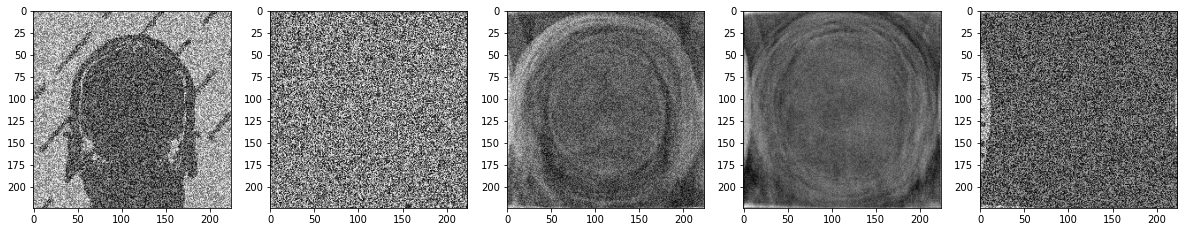

In [45]:
n = 5
fig, axs = plt.subplots(1, n, figsize=(4.1*n,4))
for i, wi in enumerate(w[:5]):
  axs[i].imshow(wi, cmap='gray')

## 2. CNN - Convolutional Neural Network

In [1]:
colab = True # set to True is using google colab

In [2]:
if colab:
    %tensorflow_version 2.x

In [3]:
import sys
import os
import cv2
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipyd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
#Feeding Training Data to X_train and y_train

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
train_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/glioma_tumor"
train_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor"
train_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Training/no_tumor"
train_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Training/pituitary_tumor"

X_train = []
y_train = []

for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_train.append(img)
    y_train.append('Glioma')
    
for i in tqdm(os.listdir(train_meningioma)):
    path = os.path.join(train_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_train.append(img)
    y_train.append('Meningioma')
    
for i in tqdm(os.listdir(train_no_tumour)):
    path = os.path.join(train_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_train.append(img)
    y_train.append('No_Tumour')   
    
for i in tqdm(os.listdir(train_pituitary)):
    path = os.path.join(train_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_train.append(img)
    y_train.append('Pituitary') 

100%|██████████| 827/827 [00:03<00:00, 258.05it/s]


In [5]:
#Feeding Testing Data to X_train and y_train

train_dir = "/content/Brain-Tumor-Classification-DataSet-master/Training"
test_dir = "/content/Brain-Tumor-Classification-DataSet-master/Testing"
test_glioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/glioma_tumor"
test_meningioma = "/content/Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor"
test_no_tumour = "/content/Brain-Tumor-Classification-DataSet-master/Testing/no_tumor"
test_pituitary = "/content/Brain-Tumor-Classification-DataSet-master/Testing/pituitary_tumor"

X_test = []
y_test = []

for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_test.append(img)
    y_test.append('Glioma')
    
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_test.append(img)
    y_test.append('Meningioma')
    

for i in tqdm(os.listdir(test_no_tumour)):
    path = os.path.join(test_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_test.append(img)
    y_test.append('No_Tumour') 
    
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    X_test.append(img)
    y_test.append('Pituitary')  

100%|██████████| 74/74 [00:00<00:00, 136.04it/s]


In [6]:
X_train_2d = np.array(X_train)
y_train = np.array(y_train)
X_train_2d.shape,y_train.shape

((2870, 128, 128, 3), (2870,))

In [7]:
X_test_2d = np.array(X_test)
y_test = np.array(y_test)
X_test_2d.shape,y_test.shape

((394, 128, 128, 3), (394,))

In [8]:
X_train_2d = X_train_2d/255.0
X_test_2d = X_test_2d/255.0


print ('train: data shape', X_train_2d.shape, 'label shape', y_train.shape)
print ('test: data shape', X_test_2d.shape, 'label shape', y_test.shape)

train: data shape (2870, 128, 128, 3) label shape (2870,)
test: data shape (394, 128, 128, 3) label shape (394,)


In [9]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [11]:
n_train = X_train_2d.shape[0]
n_test = X_test_2d.shape[0]

X_train = X_train_2d   #[..., np.newaxis]
X_test = X_test_2d     #[..., np.newaxis]

y_train_1_hot = np.zeros((n_train, y_train.max()+1))
y_train_1_hot[np.arange(n_train),y_train] = 1

y_test_1_hot = np.zeros((n_test, y_test.max()+1))
y_test_1_hot[np.arange(n_test), y_test] = 1

In [12]:
img = X_train[0,:,:,0]
lbl = y_train[0]
lbl_1_hot = y_train_1_hot[0]

one-hot label: [1. 0. 0. 0.] . Actual label: 0


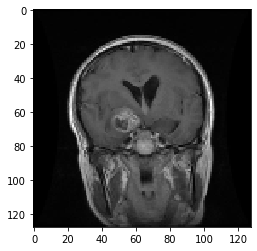

In [13]:
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.grid(False)
print('one-hot label:',lbl_1_hot, '. Actual label:', lbl )

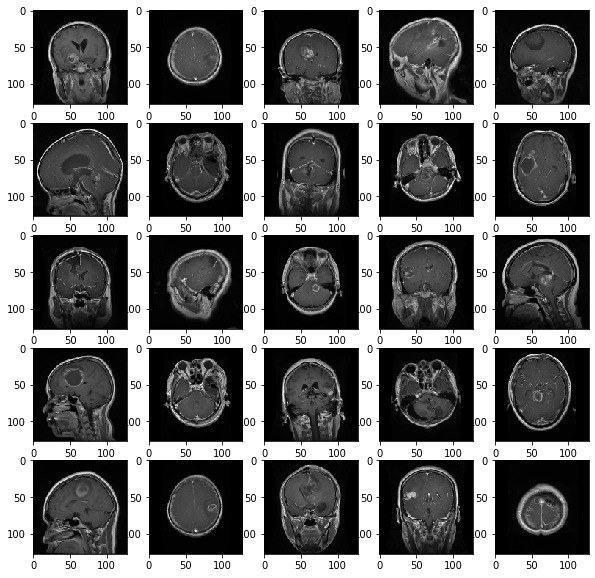

In [14]:
fig, axs = plt.subplots(5, 5, figsize=(10,10))
for idx, im in enumerate(X_train[0:25,:,:,0]):
    y_idx = idx // 5
    x_idx = idx % 5
    axs[y_idx][x_idx].imshow(im, cmap='gray', interpolation='nearest')
    axs[y_idx][x_idx].grid(False)
plt.show()

In [15]:
def conv_2D(x, n_output_ch,
            k=3,
            s=1,
            activation=tf.nn.relu,
            padding='VALID', name='conv2d', reuse=None
           ):
    """
    Helper for creating a 2d convolution operation.

    Args:
        x (tf.Tensor): Input tensor to convolve.
        n_output_ch (int): Number of filters.
        k (int): Kernel width and height
        s (int): Stride in x and y
        activation (tf.Function): activation function to apply to the convolved data
        padding (str): Padding type: 'SAME' or 'VALID'
        name (str): Variable scope
        reuse (tf.Flag): Flag whether to use existing variable. Can be False(None), True, or tf.AUTO_REUSE

    Returns:
        op (tf.Tensor, tf.Tensor, tf.Tensor, tf.Tensor): Output of activation, convolution, weights, bias
    """
    with tf.variable_scope(name or 'conv2d', reuse=reuse):
        w = tf.get_variable(name='W',
                            shape=[k, k, x.get_shape()[-1], n_output_ch],
                            initializer=tf.initializers.he_uniform()
                           )
        
        wx = tf.nn.conv2d(name='conv',
                          input=x, filter=w,
                          strides=[1, s, s, 1],
                          padding=padding
                         )
        
        b = tf.get_variable(name='b',
                            shape=[n_output_ch], initializer=tf.initializers.constant(value=0.0)
                           )
        h = tf.nn.bias_add(name='h',
                           value=wx,
                           bias=b
                          )

        if activation is not None:
            x = activation(h, name=activation.__name__)
        else:
            x = h
    
    return x, w

In [16]:
def fully_connected_layer(x, n_output, name=None, activation=None):
    """Fully connected layer.

    Parameters
    ----------
    x : tf.Tensor
        Input tensor to connect
    n_output : int
        Number of output neurons
    name : None, optional
        TF Scope to apply
    activation : None, optional
        Non-linear activation function

    Returns
    -------
    h, W : tf.Tensor, tf.Tensor
        Output of the fully connected layer and the weight matrix
    """
    if len(x.get_shape()) != 2:
        x = tf.flatten(x, reuse=None)

    n_input = x.get_shape().as_list()[1]

    with tf.variable_scope(name or "fc", reuse=None):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            dtype=tf.float32,
            initializer=tf.initializers.glorot_uniform())

        b = tf.get_variable(
            name='b',
            shape=[n_output],
            dtype=tf.float32,
            initializer=tf.initializers.constant(0.0))

        h = tf.nn.bias_add(
            name='h',
            value=tf.matmul(x, W),
            bias=b)

        if activation:
            h = activation(h)

        return h, W

In [17]:
h, w, c = X_train.shape[1:]
n_output = y_train_1_hot.shape[1]

In [18]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, h, w, c])
    Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, n_output])
    
    L1, W1 = conv_2D(X, 16, name = 'C1')
    L2, W2 = conv_2D(L1, 32, s=2, name = 'C2')
    L3, W3 = conv_2D(L2, 32, s=2, name = 'C3')

    L3_f = tf.keras.layers.Flatten()(L3)

    L4, W4 = fully_connected_layer(L3_f , 32, 'F1', activation=tf.nn.relu)
    L5, W5 = fully_connected_layer(L4 , 4, 'F2')

    Y_onehot = tf.nn.softmax(L5, name='Logits')
    
    # prediction: onehot->integer
    Y_pred = tf.argmax(Y_onehot, axis=1, name='YPred')
    
    # cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(Y_onehot), reduction_indices=[1]))
    # here we use numerically stable implementation of the same:
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=L5, labels=Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)
    
    # get fraction of correctly assigned labels
    Y_true = tf.argmax(Y, 1)
    Correct = tf.equal(Y_true, Y_pred, name='CorrectY')
    Accuracy = tf.reduce_mean(tf.cast(Correct, dtype=tf.float32), name='Accuracy')

In [ ]:
with tf.Session(graph=g) as sess:
    acc_val = []
    acc_trn = []
    
    sess.run(tf.global_variables_initializer())

    # Now actually do some training:
    mini_batch_size = 16
    n_epochs = 20

    for epoch_i in range(n_epochs):
        # iterate minibatches
        idx = np.random.permutation(n_train)
        for mb_idx in range(n_train // mini_batch_size):
            sub_idx = idx[mini_batch_size * mb_idx : mini_batch_size * (mb_idx+1)]
            X_batch, y_batch = X_train[sub_idx], y_train_1_hot[sub_idx]

            sess.run(optimizer, feed_dict={
                X: X_batch,
                Y: y_batch
            })
            

        acr_v = sess.run(Accuracy,
                         feed_dict={
                             X: X_test,
                             Y: y_test_1_hot
                             })
        acr_t = sess.run(Accuracy,
                         feed_dict={
                             X: X_train,
                             Y: y_train_1_hot
                             })
        print(acr_t, acr_v)
        
        acc_val.append(acr_v)
        acc_trn.append(acr_t)

    # final test accuracy:
    corr, accr = sess.run((Correct, Accuracy),
                          feed_dict={
                              X: X_test,
                              Y: y_test_1_hot
                              })
    
    
    # get index of first incorrectly recognize digit and display it
    wrong_idx  = [i for i,c in enumerate(corr) if c == False]
    wrong_idx0 = wrong_idx[0]
    wrong0_lbl, L1_res, L2_res, L3_res = sess.run([Y_pred, L1, L2, L3],
                   feed_dict={
                       X: X_test[wrong_idx0:wrong_idx0+1],
                       Y: y_test_1_hot[wrong_idx0:wrong_idx0+1]
                   })
    wrong0_lbl, L1_res, L2_res, L3_res = wrong0_lbl[0], L1_res[0], L2_res[0], L3_res[0]
    #store final value of the W1
    W1_res = sess.run(W1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].plot(acc_trn)
    axs[0].plot(acc_val)
    axs[0].legend(('training accuracy', 'validation accuracy'), loc='lower right')
    axs[1].imshow(X_test[wrong_idx0], cmap='gray', interpolation='nearest')
    axs[1].grid(False)
    plt.show()
    print('found label:',wrong0_lbl, 'true label:', y_test[wrong_idx0])

The learned model parameters W1 are a matrix of weights that show importance of each input pixel (49,152) for each of the 4 outputs.

In [27]:
print(W1_res.shape)

(12, 12, 3)


Let's visualize the trained weights:

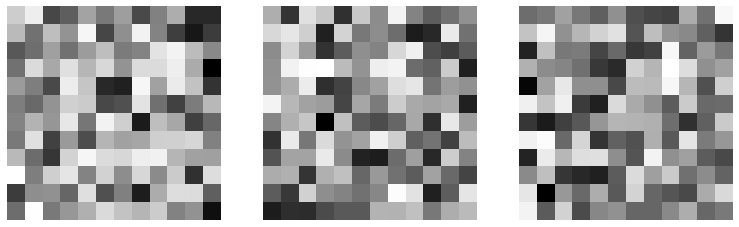

In [35]:
W1_res = W1_res.reshape(12,12,3)
_, axs = plt.subplots(1, 3, figsize=(13,5))
for i in range(3):
    axs[i].imshow(W1_res[..., i], cmap='gray', interpolation='nearest')
    axs[i].grid(False)
    axs[i].axis('off')

And we can look at the extracted feature maps:

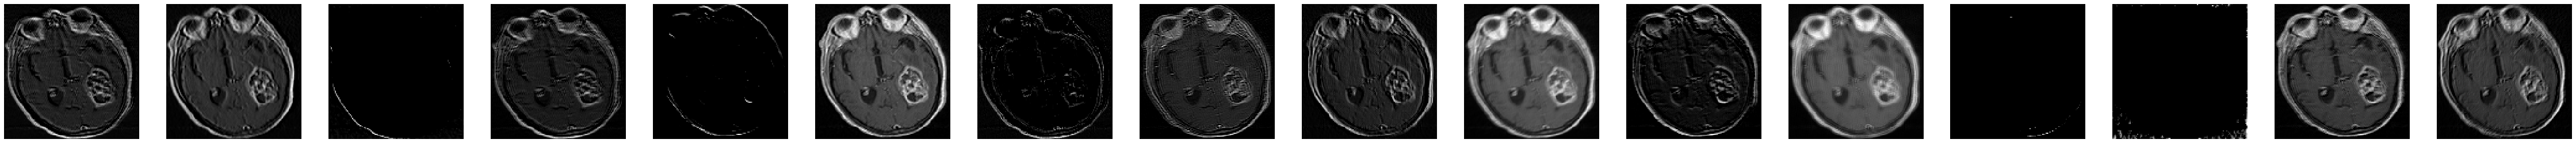

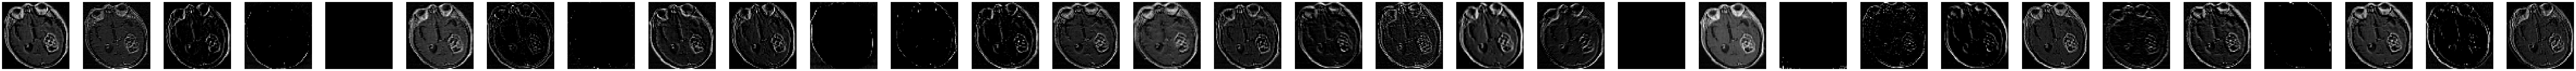

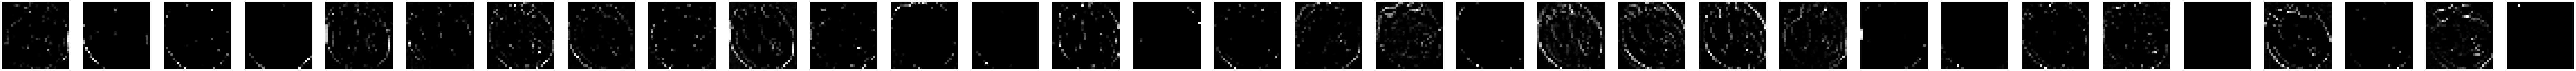

In [36]:
for L in [L1_res, L2_res, L3_res]:
  n_out = L.shape[-1]

  s = 5
  _, axs = plt.subplots(1, n_out, figsize=(s*n_out,s))
  for i in range(n_out):
      axs[i].imshow(L[..., i], cmap='gray', interpolation='nearest')
      axs[i].grid(False)
      axs[i].axis('off')
  plt.show()

## 3. CNN - Convolutional Neural Network /2

---



In [8]:
batch_size = 32
img_height = 256
img_width = 256

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Brain-Tumor-Classification-DataSet-master/Training',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2870 files belonging to 4 classes.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Brain-Tumor-Classification-DataSet-master/Testing',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 394 files belonging to 4 classes.


In [11]:
class_names = train_ds.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


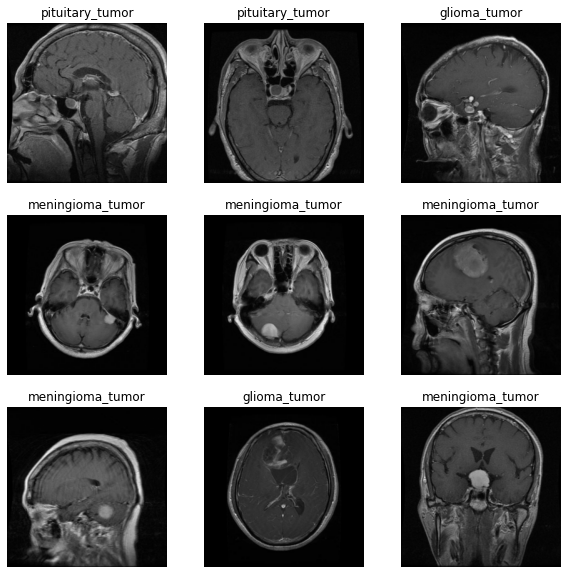

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
#normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [18]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
90/90 [==============================] - 18s 67ms/step - loss: 1.4197 - accuracy: 0.4866 - val_loss: 2.0739 - val_accuracy: 0.4873
Epoch 2/20
90/90 [==============================] - 4s 50ms/step - loss: 0.4813 - accuracy: 0.7944 - val_loss: 1.7633 - val_accuracy: 0.5508
Epoch 3/20
90/90 [==============================] - 4s 50ms/step - loss: 0.2734 - accuracy: 0.9092 - val_loss: 2.6725 - val_accuracy: 0.6371
Epoch 4/20
90/90 [==============================] - 4s 50ms/step - loss: 0.1408 - accuracy: 0.9487 - val_loss: 3.0679 - val_accuracy: 0.7234
Epoch 5/20
90/90 [==============================] - 4s 50ms/step - loss: 0.0521 - accuracy: 0.9859 - val_loss: 3.3928 - val_accuracy: 0.7284
Epoch 6/20
90/90 [==============================] - 4s 50ms/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 4.5569 - val_accuracy: 0.7234
Epoch 7/20
90/90 [==============================] - 4s 50ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 4.1909 - val_accuracy: 0.7614
Epoch 8/20
9

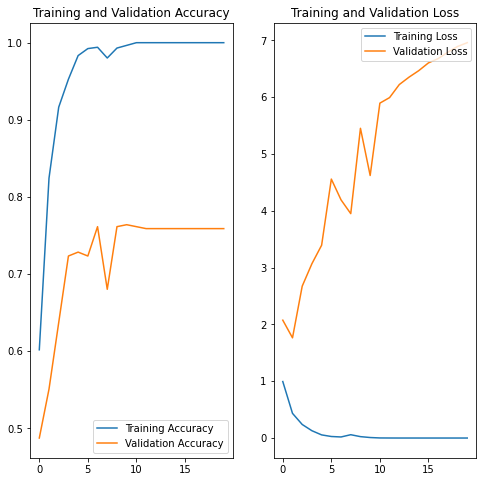

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

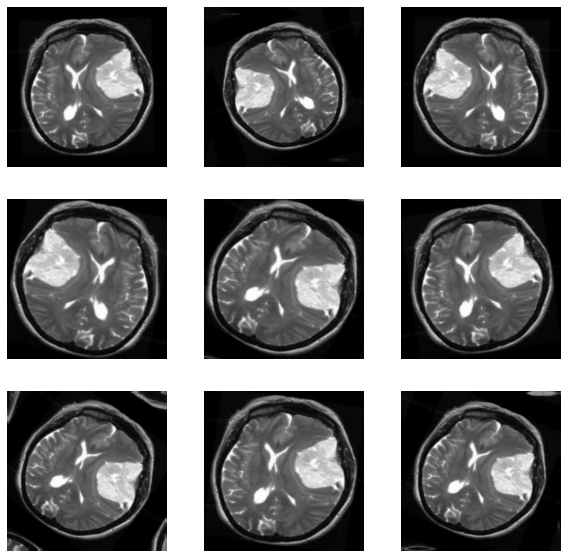

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

In [25]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
90/90 [==============================] - 7s 68ms/step - loss: 1.3946 - accuracy: 0.4745 - val_loss: 2.0704 - val_accuracy: 0.3173
Epoch 2/15
90/90 [==============================] - 6s 67ms/step - loss: 0.9187 - accuracy: 0.6196 - val_loss: 2.0195 - val_accuracy: 0.3731
Epoch 3/15
90/90 [==============================] - 6s 67ms/step - loss: 0.7299 - accuracy: 0.6821 - val_loss: 1.8810 - val_accuracy: 0.4619
Epoch 4/15
90/90 [==============================] - 6s 67ms/step - loss: 0.6388 - accuracy: 0.7396 - val_loss: 1.9702 - val_accuracy: 0.4315
Epoch 5/15
90/90 [==============================] - 6s 67ms/step - loss: 0.5837 - accuracy: 0.7555 - val_loss: 1.9370 - val_accuracy: 0.4391
Epoch 6/15
90/90 [==============================] - 6s 66ms/step - loss: 0.5812 - accuracy: 0.7519 - val_loss: 2.3980 - val_accuracy: 0.4315
Epoch 7/15
90/90 [==============================] - 6s 67ms/step - loss: 0.4800 - accuracy: 0.8001 - val_loss: 2.3521 - val_accuracy: 0.4289
Epoch 8/15
90

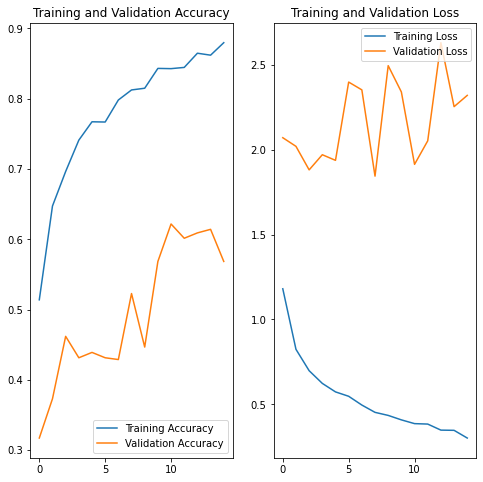

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

122880/117948 [===============================] - 0s 0us/step
This image most likely belongs to pituitary_tumor with a 99.98 percent confidence.
